In [123]:
# Import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
# Load The Data
Country = pd.read_excel("C:/Users/Afreg/Python/UTS AI/GDP_Per_Capita_and_Life_Satisfaction.xlsx", header=0)
Country

,Country,GDP Per Capita (USD),Life Satisfaction
0,Afghanistan,580.817,0.0
1,Albania,5286.679,0.0
2,Algeria,3262.579,0.0
3,Angola,2012.147,0.0
4,Antigua and Barbuda,14168.263,0.0
...,...,...,...
170,Vietnam,3498.976,0.0
171,West Bank and Gaza,3042.174,0.0
172,Yemen,620.240,0.0
173,Zambia,981.311,0.0


In [125]:
# Convert Data String to Integer
Country['GDP Per Capita (USD)'] = Country['GDP Per Capita (USD)'].astype('int')
Country

,Country,GDP Per Capita (USD),Life Satisfaction
0,Afghanistan,580,0.0
1,Albania,5286,0.0
2,Algeria,3262,0.0
3,Angola,2012,0.0
4,Antigua and Barbuda,14168,0.0
...,...,...,...
170,Vietnam,3498,0.0
171,West Bank and Gaza,3042,0.0
172,Yemen,620,0.0
173,Zambia,981,0.0


In [107]:
# Filter Data Life Satisfactio >0
GL = Country.loc[Country['Life Satisfaction'] != 0.]
GL

,Country,GDP Per Capita (USD),Life Satisfaction
8,Australia,52824,7.3
9,Austria,48154,7.1
16,Belgium,44529,6.9
40,Denmark,60494,7.6
49,Estonia,23330,5.7
53,France,39907,6.5
57,Germany,45732,7.0
67,Hungary,15820,5.6
68,Iceland,59633,7.5
73,Israel,43688,7.2


In [126]:
# Prepare The Data
x = np.c_[GL["GDP Per Capita (USD)"]]
y = np.c_[GL["Life Satisfaction"]]

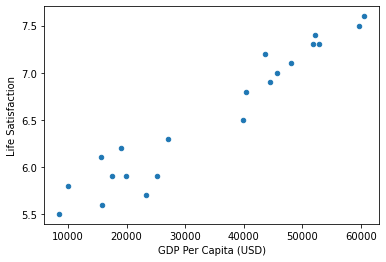

In [127]:
# Visualize The Data
GL.plot(kind='scatter', x="GDP Per Capita (USD)", y='Life Satisfaction')
plt.show()

# Model Linear Regression Using Scikit-Learn

In [128]:
# Model Initialization and Select a Linear Model
Model_RG = sklearn.linear_model.LinearRegression()

In [129]:
# Fit The Data (Train The Model)
Model_RG.fit(x, y)

LinearRegression()

In [130]:
# Predict Model
New_LS = Model_RG.predict(x)

In [131]:
# Model Evaluation
rmse = mean_squared_error(y, New_LS)
r2 = r2_score(y, New_LS)

In [217]:
# Printing Values
print('Slope:' ,Model_RG.coef_)
print('Intercept:', Model_RG.intercept_)
print('Root Mean Squared Error: ', rmse)
print('R2 Score: ', r2)

Slope: [[3.98957843e-05]]
Intercept: [5.17656052]
Root Mean Squared Error:  0.03258260446767599
R2 Score:  0.9309717113266472


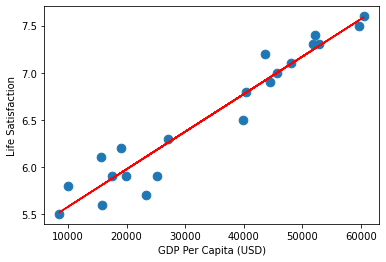

In [134]:
# Data Points
plt.scatter(x, y,s=75)
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Life Satisfaction')

# Predicted Values
plt.plot(x, New_LS, color='r')
plt.show()

In [245]:
# GDP Country
int(Country.loc[Country['Country']=='Hong Kong SAR']['GDP Per Capita (USD)'].values)

46753

In [246]:
# Make a prediction for Life Satisfaction Based GDP Country
LS_Country = [[int(Country.loc[Country['Country']=='Hong Kong SAR']['GDP Per Capita (USD)'].values)]] # Country GDP per capita
print(Model_RG.predict(LS_Country))

[[7.04180813]]


# Model k-Nearest Neighbors Regression 

In [204]:
# Select a k-Nearest Neighbors Regression (In This Example, k = 3).
Model_kNNR = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [205]:
# Train The Model
Model_kNNR.fit(X, Y)

KNeighborsRegressor(n_neighbors=3)

In [247]:
# Make a prediction for Life Satisfaction Based GDP Country
LS_Country = [[int(Country.loc[Country['Country']=='Hong Kong SAR']['GDP Per Capita (USD)'].values)]] # Country GDP per capita
print(Model_kNNR.predict(LS_Country))

[[7.]]


## Comparing Model Regresi Linear and k-Nearest Neighbors

In [248]:
ab = Model_RG.predict(LS_Country)
bc = Model_kNNR.predict(LS_Country)
ab-bc

array([[0.04180813]])